# Homework 2
## Problem 1
#### First set up everything from Homework 1

In [1]:
import pandas as pd

df = pd.read_csv("datasets/auto-mpg.data", delim_whitespace=True, names=['mpg','cylinders','displacement','horsepower','weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
df_original = df.shape
#df.replace('?', np.nan, inplace = True) #replace '?' with null 

#df[df['horsepower'].isnull() == True]                                  #find all rows where the horsepower column has value of null
missing_item_index = df[df['horsepower'].values == '?'].index.tolist()   #Store the index of missing item in list
missing_rows = df[df['horsepower'].values == '?']                        #find all rows where the horsepower column has value of ?
df.drop(labels = missing_item_index, axis = 0, inplace = True)  
        

        

In [3]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.b = []
        self.X = []
        return
        
    
    def fit(self, x, y, order):
        self.index = 0
        
        self.X = np.c_[np.ones(len(x))]   #initialize X as a matrix having columns of ones. This corresponds to polynomial of order 0
        while True:
            if self.index < order and order != 0:                          #concatenate power of x to original matrices X
                self.index += 1
                self.X = np.c_[self.X, np.power(x, self.index)]
            
            else:
                break
        self.b = np.linalg.inv(self.X.T@self.X)@(self.X.T@y)           # w = (X^T*X)^-1*(X^T*y) Formula given in lecture
        
        
        return self.X, self.b
    
    def predict(self, x):
        
        predict_array = self.X@self.b                  #prediction array is just X*w
        
        return predict_array
    
    
    def mse(self, y, predict_array):
        
        self.mse_array = y - predict_array
        
        self.mse = np.power(self.mse_array, 2)
        
        return np.sum(self.mse)/len(y)
            
            

In [4]:
df['horsepower'] = df['horsepower'].astype(float)
df['cylinders'] = df['cylinders'].astype(float)
x = np.array(df['horsepower'])
y = np.array(df['cylinders'])
hello = LinearRegression()
hello.fit(x,y,2)[1]
n = hello.predict(x)
hello.mse(y, n)

#Testing Linear Regression

0.7660809195636852

In [5]:
df.shape[0]*0.7

274.4

#### Split the dataset into first 70% rows for training and last 30% rows for testing

In [6]:
x_train_mpg = np.array(df['mpg'][:274])
x_test_mpg = np.array(df['mpg'][274:])
y_train_weight = np.array(df['weight'][:274])
y_test_weight = np.array(df['weight'][274:])
x_train_cylinders = np.array(df['cylinders'][:274])
x_test_cylinders = np.array(df['cylinders'][274:])
x_train_displacement = np.array(df['displacement'][:274])
x_test_displacement = np.array(df['displacement'][274:])
x_train_horsepower = np.array(df['horsepower'][:274])
x_test_horsepower = np.array(df['horsepower'][274:])
x_train_acceleration = np.array(df['acceleration'][:274])
x_test_acceleration = np.array(df['acceleration'][274:])
x_train_model_year = np.array(df['model_year'][:274])
x_test_model_year = np.array(df['model_year'][274:])
x_train_origin = np.array(df['origin'][:274])
x_test_origin = np.array(df['origin'][274:])

#Split the dataset into first 70% rows for training and last 30% rows for testing

#### Plotting mpg vs weight
#### The training set is used for fitting and the test set is used for predicting

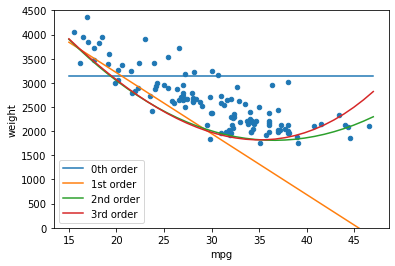

In [7]:
import math
import matplotlib.pyplot as plt

hello = LinearRegression()
b_array0 = hello.fit(x_train_mpg,y_train_weight,0)[1]     
b_array1 = hello.fit(x_train_mpg,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_mpg,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_mpg,y_train_weight,3)[1]


fx = np.linspace(math.floor(x_test_mpg.min()), math.ceil(x_test_mpg.max()),math.ceil(x_test_mpg.max())- math.floor(x_test_mpg.min()))


fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_mpg,y_test_weight, s = 20)
plt.xlabel("mpg")
plt.ylabel("weight")
plt.ylim(0, 4500)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "lower left")


#### Plotting cylinders vs weight

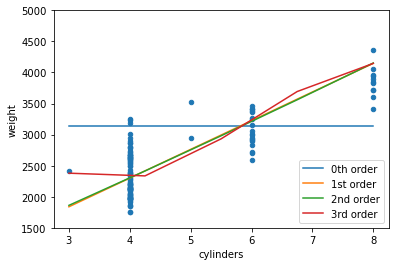

In [8]:
b_array0 = hello.fit(x_train_cylinders,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_cylinders,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_cylinders,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_cylinders,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_cylinders.min()), math.ceil(x_test_cylinders.max()),math.ceil(x_test_cylinders.max())- math.floor(x_test_cylinders.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_cylinders,y_test_weight, s = 20)
plt.xlabel("cylinders")
plt.ylabel("weight")
plt.ylim(1500,5000)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "lower right")




#### Plotting displacement vs weight

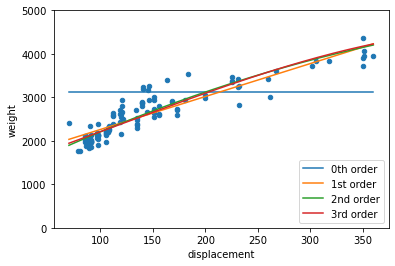

In [9]:
b_array0 = hello.fit(x_train_displacement,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_displacement,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_displacement,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_displacement,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_displacement.min()), math.ceil(x_test_displacement.max()),math.ceil(x_test_displacement.max())- math.floor(x_test_displacement.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_displacement,y_test_weight, s = 20)
plt.xlabel("displacement")
plt.ylabel("weight")
plt.ylim(0,5000)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "lower right")


#### Plotting horsepower vs weight

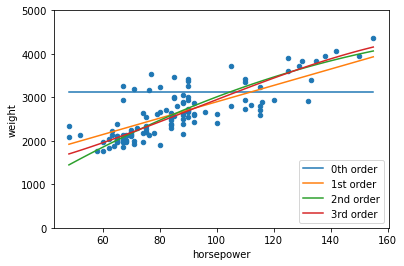

In [10]:
b_array0 = hello.fit(x_train_horsepower,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_horsepower,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_horsepower,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_horsepower,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_horsepower.min()), math.ceil(x_test_horsepower.max()),math.ceil(x_test_horsepower.max())- math.floor(x_test_horsepower.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_horsepower,y_test_weight, s = 20)
plt.xlabel("horsepower")
plt.ylabel("weight")
plt.ylim(0,5000)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "lower right")


#### Plotting acceleration vs weight

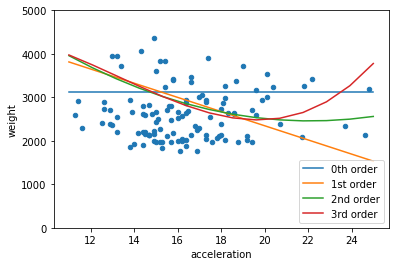

In [11]:
b_array0 = hello.fit(x_train_acceleration,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_acceleration,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_acceleration,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_acceleration,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_acceleration.min()), math.ceil(x_test_acceleration.max()),math.ceil(x_test_acceleration.max())- math.floor(x_test_acceleration.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_acceleration,y_test_weight, s = 20)
plt.xlabel("acceleration")
plt.ylabel("weight")
plt.ylim(0,5000)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "lower right")

#### Plotting model year vs weight

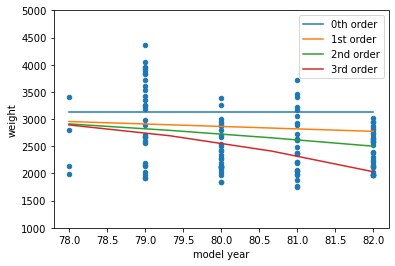

In [12]:
b_array0 = hello.fit(x_train_model_year,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_model_year,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_model_year,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_model_year,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_model_year.min()), math.ceil(x_test_model_year.max()),math.ceil(x_test_model_year.max())- math.floor(x_test_model_year.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_model_year,y_test_weight, s = 20)
plt.xlabel("model year")
plt.ylabel("weight")
plt.ylim(1000,5000)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "upper right")

#### Plotting origin vs weight

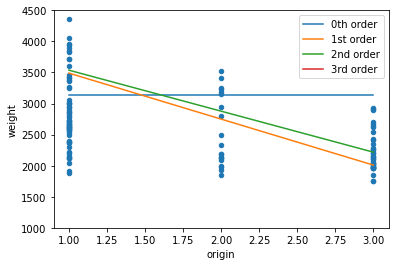

In [13]:
b_array0 = hello.fit(x_train_origin,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_origin,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_origin,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_origin,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_origin.min()), math.ceil(x_test_origin.max()),math.ceil(x_test_origin.max())- math.floor(x_test_origin.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_origin,y_test_weight, s = 20)
plt.xlabel("origin")
plt.ylabel("weight")
plt.ylim(1000,4500)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "upper right")

#### Splitting the dataset into 80% for training and 20% for testing

In [14]:
df.shape[0]*0.8

313.6

In [15]:
x_train_mpg = np.array(df['mpg'][:314])
x_test_mpg = np.array(df['mpg'][314:])
y_train_weight = np.array(df['weight'][:314])
y_test_weight = np.array(df['weight'][314:])
x_train_cylinders = np.array(df['cylinders'][:314])
x_test_cylinders = np.array(df['cylinders'][314:])
x_train_displacement = np.array(df['displacement'][:314])
x_test_displacement = np.array(df['displacement'][314:])
x_train_horsepower = np.array(df['horsepower'][:314])
x_test_horsepower = np.array(df['horsepower'][314:])
x_train_acceleration = np.array(df['acceleration'][:314])
x_test_acceleration = np.array(df['acceleration'][314:])
x_train_model_year = np.array(df['model_year'][:314])
x_test_model_year = np.array(df['model_year'][314:])
x_train_origin = np.array(df['origin'][:314])
x_test_origin = np.array(df['origin'][314:])

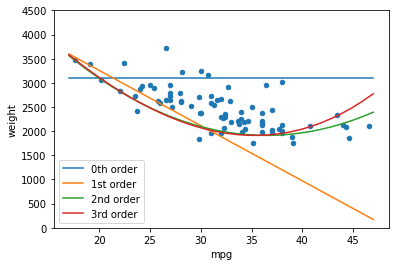

In [16]:
b_array0 = hello.fit(x_train_mpg,y_train_weight,0)[1]
b_array1 = hello.fit(x_train_mpg,y_train_weight,1)[1]
b_array2 = hello.fit(x_train_mpg,y_train_weight,2)[1]
b_array3 = hello.fit(x_train_mpg,y_train_weight,3)[1]

fx = np.linspace(math.floor(x_test_mpg.min()), math.ceil(x_test_mpg.max()),math.ceil(x_test_mpg.max())- math.floor(x_test_mpg.min()))

fy0 = b_array0[0] + 0*fx 
fy1 = b_array1[0] + b_array1[1]*fx 
fy2 = b_array2[0] + b_array2[1]*fx + b_array2[2]*np.power(fx, 2)
fy3 = b_array3[0] + b_array3[1]*fx + b_array3[2]*np.power(fx, 2) +  b_array3[3]*np.power(fx, 3)

plt.scatter(x_test_mpg,y_test_weight, s = 20)
plt.xlabel("mpg")
plt.ylabel("weight")
plt.ylim(0, 4500)
plt.plot(fx,fy0)
plt.plot(fx,fy1)
plt.plot(fx,fy2)
plt.plot(fx,fy3)
plt.legend(["0th order", "1st order", "2nd order", "3rd order"], loc = "lower left")

#### For mpg vs weight, the plot does not change much. This is because the model parameters (or b_array) does not change much at all between 70% and 80% of training set. However, it can be noted that the initial starting point for 1st, 2nd and 3rd order is higher in 70% training set (at around 4000) while for 80% training set, the initial point is around 3600. 

## Problem 2

In [17]:
#dividing cars into 3 categories by weight
min_wt = min(df['weight'])
max_wt = max(df['weight'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df['weight'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['weight'] and row['weight'] <= bin1_end:
        return 'light'
    elif row['weight'] <= bin2_end:
        return 'medium'
    else:
        return 'heavy'
df['weight_categ'] = df.apply(lambda row: label_wt(row),axis=1)
df.head()

# citation: This is pulled from HW1 solution.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,weight_categ
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,medium
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,medium
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,medium
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,medium
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,1,ford torino,medium


#### Logistic Regression model of mpg vs weight category

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

X = df[['mpg']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False) #shuffle set False to prevent randomizing the dataset

model_mpg = LogisticRegression()
model_mpg.fit(x_train, y_train)
model_mpg.predict(x_test)
model_mpg.score(x_test, y_test)

y_pred = model_mpg.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)

#average is using weighted instead of macro because there are some disparities between the number of samples in each weight categories

0.7796719872744228

#### Logistic Regression model of cylinders vs weight category

In [19]:
X = df[['cylinders']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_cylinders = LogisticRegression()
model_cylinders.fit(x_train, y_train)
model_cylinders.predict(x_test)
model_cylinders.score(x_test, y_test)

y_pred = model_cylinders.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)


0.8376348228043143

#### Logistic Regression model of displacement vs weight category

In [20]:
X = df[['displacement']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_displacement = LogisticRegression()
model_displacement.fit(x_train, y_train)
model_displacement.predict(x_test)
model_displacement.score(x_test, y_test)

y_pred = model_displacement.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)

0.8427159492049824

#### Logistic Regression model of horsepower vs weight category 

In [21]:
X = df[['horsepower']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_horsepower = LogisticRegression()
model_horsepower.fit(x_train, y_train)
model_horsepower.predict(x_test)
model_horsepower.score(x_test, y_test)

y_pred = model_horsepower.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)

0.7633414043583534

#### Logistic Regression model of acceleration vs weight category

In [22]:
X = df[['acceleration']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_acceleration = LogisticRegression()
model_acceleration.fit(x_train, y_train)
model_acceleration.predict(x_test)
model_acceleration.score(x_test, y_test)

y_pred = model_acceleration.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)

0.4811110757782936

#### Logistic Regression model of model year vs weight category

In [23]:
X = df[['model_year']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_model_year = LogisticRegression()
model_model_year.fit(x_train, y_train)
model_model_year.predict(x_test)
model_model_year.score(x_test, y_test)

y_pred = model_model_year.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)

0.10370583165756966

#### Logistic Regression model of origin vs weight category

In [24]:
X = df[['origin']]
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_origin = LogisticRegression()
model_origin.fit(x_train, y_train)
model_origin.predict(x_test)
model_origin.score(x_test, y_test)

y_pred = model_origin.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0)  
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0)

0.6759918690864422

#### Q2 (b1)
#### mpg Precision: 0.7796719872744228 
#### mpg Recall: 0.7711864406779662
#### cylinders Precision: 0.8376348228043143
#### cylinders Recall: 0.788135593220339
#### displacement Precision: 0.8427159492049824
#### displacement Recall: 0.8220338983050848
#### horsepower Precision: 0.7633414043583534
#### horsepower Recall: 0.7711864406779662
#### acceleration Precision: 0.4811110757782936
#### acceleration Recall: 0.4830508474576271
#### model_year Precision: 0.10370583165756966
#### model_year Recall: 0.3220338983050847
#### origin Precision: 0.6759918690864422
#### origin Recall: 0.6186440677966102


#### Q2 (b2)
#### Example: Spam Detection
#### In the case of spam detection, the precision and recall metrics are given by True positive/(True positive + False positive) and True positive/(True positive + False negative). True positive means that the mail was a spam and also labeled as a spam. False positive means that the mail was not a spam but labeled as a spam. False negative means that the mail was a spam but not labeled as a spam. Therefore, if the user doesn't want to miss any important mails, the user wants the precision metrics to be as high as possible, so the false positive should decrease. In this situation, the precision is more important than recall metric. 

## Problem 3

In [25]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['mpg']])  # apply normalization to mpg column
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_mpg = LogisticRegression()
model_mpg.fit(x_train, y_train)

y_pred = model_mpg.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 



0.7717917675544794

In [26]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['cylinders']])
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_cylinders = LogisticRegression()
model_cylinders.fit(x_train, y_train)

y_pred = model_cylinders.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 

0.8376348228043143

In [27]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['displacement']])
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_displacement = LogisticRegression()
model_displacement.fit(x_train, y_train)

y_pred = model_displacement.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 

0.8592230182305318

In [28]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['horsepower']])
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_horsepower = LogisticRegression()
model_horsepower.fit(x_train, y_train)

y_pred = model_horsepower.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 

0.7940627522195318

In [29]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['acceleration']])
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_acceleration = LogisticRegression()
model_acceleration.fit(x_train, y_train)

y_pred = model_acceleration.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 

0.5346366204417051

In [30]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['model_year']])
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_model_year = LogisticRegression()
model_model_year.fit(x_train, y_train)

y_pred = model_model_year.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 

0.10370583165756966

In [31]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['origin']])
X = scaled_values
Y = df['weight_categ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

model_origin = LogisticRegression()
model_origin.fit(x_train, y_train)

y_pred = model_origin.predict(x_test)
precision_score(y_test,y_pred, average = "weighted", zero_division = 0) 
#recall_score(y_test,y_pred, average = "weighted", zero_division = 0) 

0.6759918690864422

#### After Min-Max Normalization
#### 
#### mpg Precision: 0.7717917675544794
#### mpg Recall: 0.7627118644067796
#### cylinders Precision: 0.8376348228043143
#### cylinders Recall: 0.788135593220339
#### displacement Precision: 0.8592230182305318
#### displacement Recall: 0.8050847457627118
#### horsepower Precision: 0.7940627522195318
#### horsepower Recall: 0.788135593220339
#### acceleration Precision: 0.5346366204417051
#### acceleration Recall: 0.5932203389830508
#### model_year Precision: 0.10370583165756966
#### model_year Recall: 0.3220338983050847
#### origin Precision: 0.6759918690864422
#### origin Recall: 0.6186440677966102

#### For example looking at mpg precision and recall, there are differences before and after min max normalization is applied. However, the difference is really small. There is more notable difference in acceleration where the difference is between 0.05 to 0.1 for precision and recall metrics. On the other hand, there are also features like model_year where the precision and recall stays the same regardless of min max normalization. 

## Problem 4

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df['cylinders'] = df['cylinders']**2               #cylinders is 2nd order, all other features are 1st order
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]
Y = df['mpg']
model.fit(X,Y)

model.predict([[4, 400, 150, 3500, 8, 81, 1]])

array([24.92999297])

#### (a) The mpg rating to be expected is 24.92999297.

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = df[['weight']]
Y = df['weight_categ']
model.fit(X,Y)

model.predict([[3500]])

array(['medium'], dtype=object)

#### (b) The weight category corresponding to 3500 lb is medium.

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df['weight'] = df['weight']**2               
X = df[['weight']]
Y = df['mpg']
model.fit(X,Y)

model.predict([[3500]])

array([34.46524456])

#### (b) The mpg rating corresponding to weight of 3500 lb is 34.46524456